## Credit Card Fraud Detection

### Problem Statement
Capstone is based on to predict fraudulent credit card transactions using exploratory data analysis and machine learning models.
Here, we need to understand frauds from bank's perspective and create machine learning model to predict frauds so that are able to recognize fraudulent
credit card transactions so that customers are not charged for items that they did not make purchases.
Dataset:
For this Capstone project, Dataset is available on Kaggle which contains transactions made by credit cards in September 2013 by European cardholders.
The dataset contains 492 frauds out of 284,807 transactions that occurred in 2 days.
Due to confidentiality issues, the dataset contains only numerical input variables which are the result of a PCA transformation.
It consists 28 Principal Components, along with Time and Amount of the Transaction and Feature 'Class' is the response variable and it takes value 1 in case of
fraud and 0 for normal transactions.
Since, we have only 492 frauds, the dataset is considered as highly class imbalanced, the positive class (frauds) account for 0.172% of all transactions. In order
to overcome this, we have to perform under sampling or up sampling on the dataset to make it balanced.
#### Solution Approach:
Here, providing the index of steps needs to be done for the solution.
1. Exploratory Data Analysis
2. Handle Class Imbalance and prepare data for model training
3. Train-validation-test Split and Hyper-parameter tuning
4. Create different classification models to check which model performs better.
5. Model Evaluation

##### 1. Exploratory data Analysis
- Load the data-set to the dataframe and will check the skewness of data and we need to mitigate this skewness.
- Create Heatmap to see co-relation between the features.
- Perform univariate and bivariate analysis of the features to check significance.
##### 2. Handle Class Imbalance and prepare data for model training

This is very important step to be performed in the project, as the data is very much imbalanced (only 0.172% data is for fraud transactions).
There are different techniques to overcome/mitigate the class imbalances.
- SMOTE -> Synthetic Minority Over-Sampling Technique- We will try this method as it uses the K-nearest neighbors approach to create random synthetic samples and see if it gives the significant samples.
- (ADASyn (Adaptive Synthesis) - We will use this approach as it also check the density of samples and see if it gives the significant samples.
The data is standardized in order to achieve zero mean and equal variance.

#####  3. Train-test Split and hyper-parameter tuning
Split the dataset for training and testing model.
- Train, Validation, Test -> This concept is used when we have large dataset and data set is balanced, but in this case our data set is unbalanced, we
cannot directly go with this approach.
- Cross-Validation -> K-fold cross-validation approach we can use by deciding the significant value of K and check how it can improve our results.
- Stratified k-folds -> We will use this approach as it randomly take points from test and train samples for cross validation and will check how this can
improve the results.
- Grid SearchCV - We will use this approach in random forest model and check how it can improve the results.

##### 4. Create different classification models to check which model performs better.
We would like to find the important features and use them to fit the model in order to reduce the complexity and increase the performance.
We will create a K-means clustering model by removing the label feature to create different segments to check the outliers using cluster distances.
Classification models
- Logistic Regression --> As the data is binary classification, first approach comes in our mind is logistic regression.To use this model, our assumption of data linearity fails.But we will create the logistic regression model to see how this will predict after handling class imbalances.

- Decision Tree Classifier - As our data set it imbalance and we are trying to mitigate this using different techniques and due to imbalance of data,decision tree tries to over fit and it is difficult to stop model to certain depth of overcome over fitting.We will try this approach as well to see how it performs.
- Random Forest Classifier --> We will use this model and check how it performs to predict the frauds.
- XGboost - We will use this model and check how it performs to predict the frauds.

#####  5. Model Evaluation
- AUC- ROC Curve --> We will use this curve to check performance of model, higher the area under the curve, higher the model performance.We will create ROC curve using True-Positives and False Positives and here need to maximize the value of True-positives and minimize the value of false positves.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy import interp
import itertools

Using TensorFlow backend.


In [2]:
from pandas.plotting import scatter_matrix
import os
from imblearn.over_sampling import ADASYN 
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

In [3]:
# import dataset
df = pd.read_csv(r"C:\Users\hp\Downloads\creditcardfraud\creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.gridspec as gridspec

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [7]:
df.shape

(284807, 31)

In [8]:
#Checking null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### There are no null values in the dataset

### EDA

In [9]:
#Fraud vs non-fraud cases
print('Number of Non-Fraud cases are ',len(df[df['Class']==0]))
print('Number of Fraud cases are ',len(df[df['Class']==1]))
print('percentage of Fraud cases over Non-Fraud cases ', round(len(df[df['Class']==1])/len(df[df['Class']==0])*100,2),'%' )

Number of Non-Fraud cases are  284315
Number of Fraud cases are  492
percentage of Fraud cases over Non-Fraud cases  0.17 %


#### This data set is highly imbalanced

In [10]:
# Creating seperate dataset for fraud and non fraud cases
fraud=df[df['Class']==1]
non_fraud=df[df['Class']==0]

In [11]:
# This dataset contains 31 columns among these 28 columns are PCA trasformed, lets find lets explore the normal three columns first
normal_cols=['Time','Amount','Class']
df[normal_cols].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [12]:
fraud[normal_cols].describe()

,Time,Amount,Class
count,492.000000,492.000000,492.0
mean,80746.806911,122.211321,1.0
std,47835.365138,256.683288,0.0
min,406.000000,0.000000,1.0
25%,41241.500000,1.000000,1.0
50%,75568.500000,9.250000,1.0
75%,128483.000000,105.890000,1.0
max,170348.000000,2125.870000,1.0


In [13]:
non_fraud[normal_cols].describe()

,Time,Amount,Class
count,284315.000000,284315.000000,284315.0
mean,94838.202258,88.291022,0.0
std,47484.015786,250.105092,0.0
min,0.000000,0.000000,0.0
25%,54230.000000,5.650000,0.0
50%,84711.000000,22.000000,0.0
75%,139333.000000,77.050000,0.0
max,172792.000000,25691.160000,0.0


###### From data description we can see that Mean for fraud cases are higher than that of normal cases. that means fraudulent transcations draws large amount than that of normal one.
###### Lets explore more on Fraud vs Non Fraud cases...

In [14]:
#Time column is in seconds, let's derive two more columns as in which time is in minutes and hours
fraud['Time_in_minutes']=round(fraud['Time']/60,2)
fraud['Time_in_hours']=round(fraud['Time']/3600,2)
non_fraud['Time_in_minutes']=round(non_fraud['Time']/60,2)
non_fraud['Time_in_hours']=round(non_fraud['Time']/3600,2)

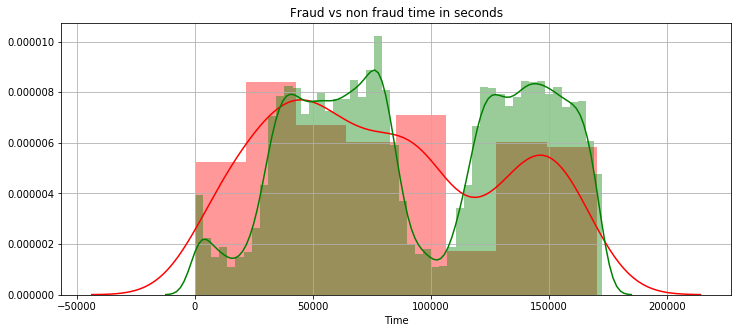

In [15]:
plt.figure(figsize=(12,5))
sns.distplot(fraud['Time'],  color='r')
sns.distplot(non_fraud['Time'],  color='g')
plt.title('Fraud vs non fraud time in seconds')
plt.grid()
plt.show()

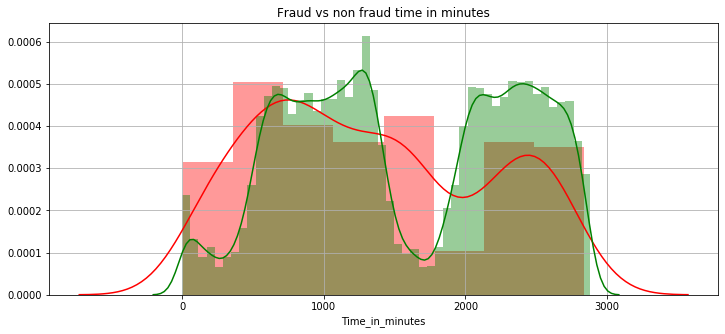

In [16]:
plt.figure(figsize=(12,5))
sns.distplot(fraud['Time_in_minutes'],  color='r')
sns.distplot(non_fraud['Time_in_minutes'],  color='g')
plt.title('Fraud vs non fraud time in minutes')
plt.grid()
plt.show()

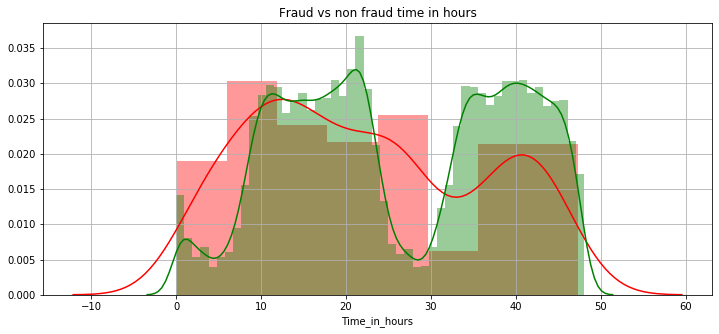

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(fraud['Time_in_hours'],  color='r')
sns.distplot(non_fraud['Time_in_hours'],  color='g')
plt.title('Fraud vs non fraud time in hours')
plt.grid()
plt.show()

#### The Dataset has transactional data of 2 days(i.e 48 hours), Non Fradulent transactions are low during 2nd to 5th hours and 25th to 30th hours.This beacuse it might be past midnight and also during these hours fradulent transactions are higher comapred to normal hours .

#### From the distribution plots, we can clearly see that chances of fruadulent transactions are high during late night, compared to other time.

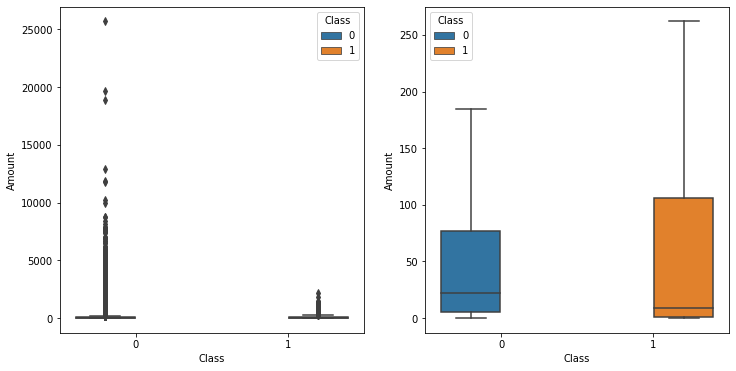

In [18]:
# Let's find out distribition of amounts
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df,showfliers=True)
sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df,showfliers=False)
plt.show();

#### From the boxplot of amounts we can say that, Non fradulent transactions have higher means,smaller q3 and q4 large outliers compared to that of fraudulent transactions.

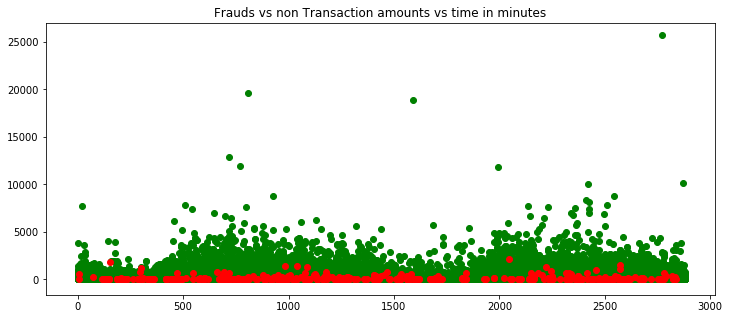

In [19]:
# scatter_plot of fraud vs non fraud amounts
plt.figure(figsize=(12,5))
plt.scatter(non_fraud['Time_in_minutes'],non_fraud['Amount'],c='g')
plt.scatter(fraud['Time_in_minutes'],fraud['Amount'],c='r')
plt.title("Frauds vs non Transaction amounts vs time in minutes")
plt.show()

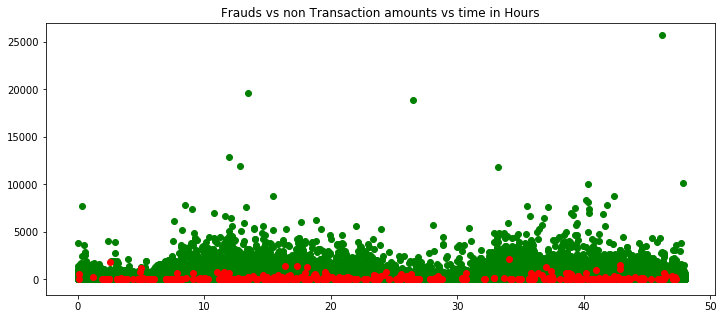

In [20]:
# scatter_plot of fraud vs non fraud amounts
plt.figure(figsize=(12,5))
plt.scatter(non_fraud['Time_in_hours'],non_fraud['Amount'],c='g')
plt.scatter(fraud['Time_in_hours'],fraud['Amount'],c='r')
plt.title("Frauds vs non Transaction amounts vs time in Hours")
plt.show()

#### The magnitude of fradulent tranaction amount is not too high compared to that of non fraud cases. The fraud transactions amounts are well with in that of the normal transactions

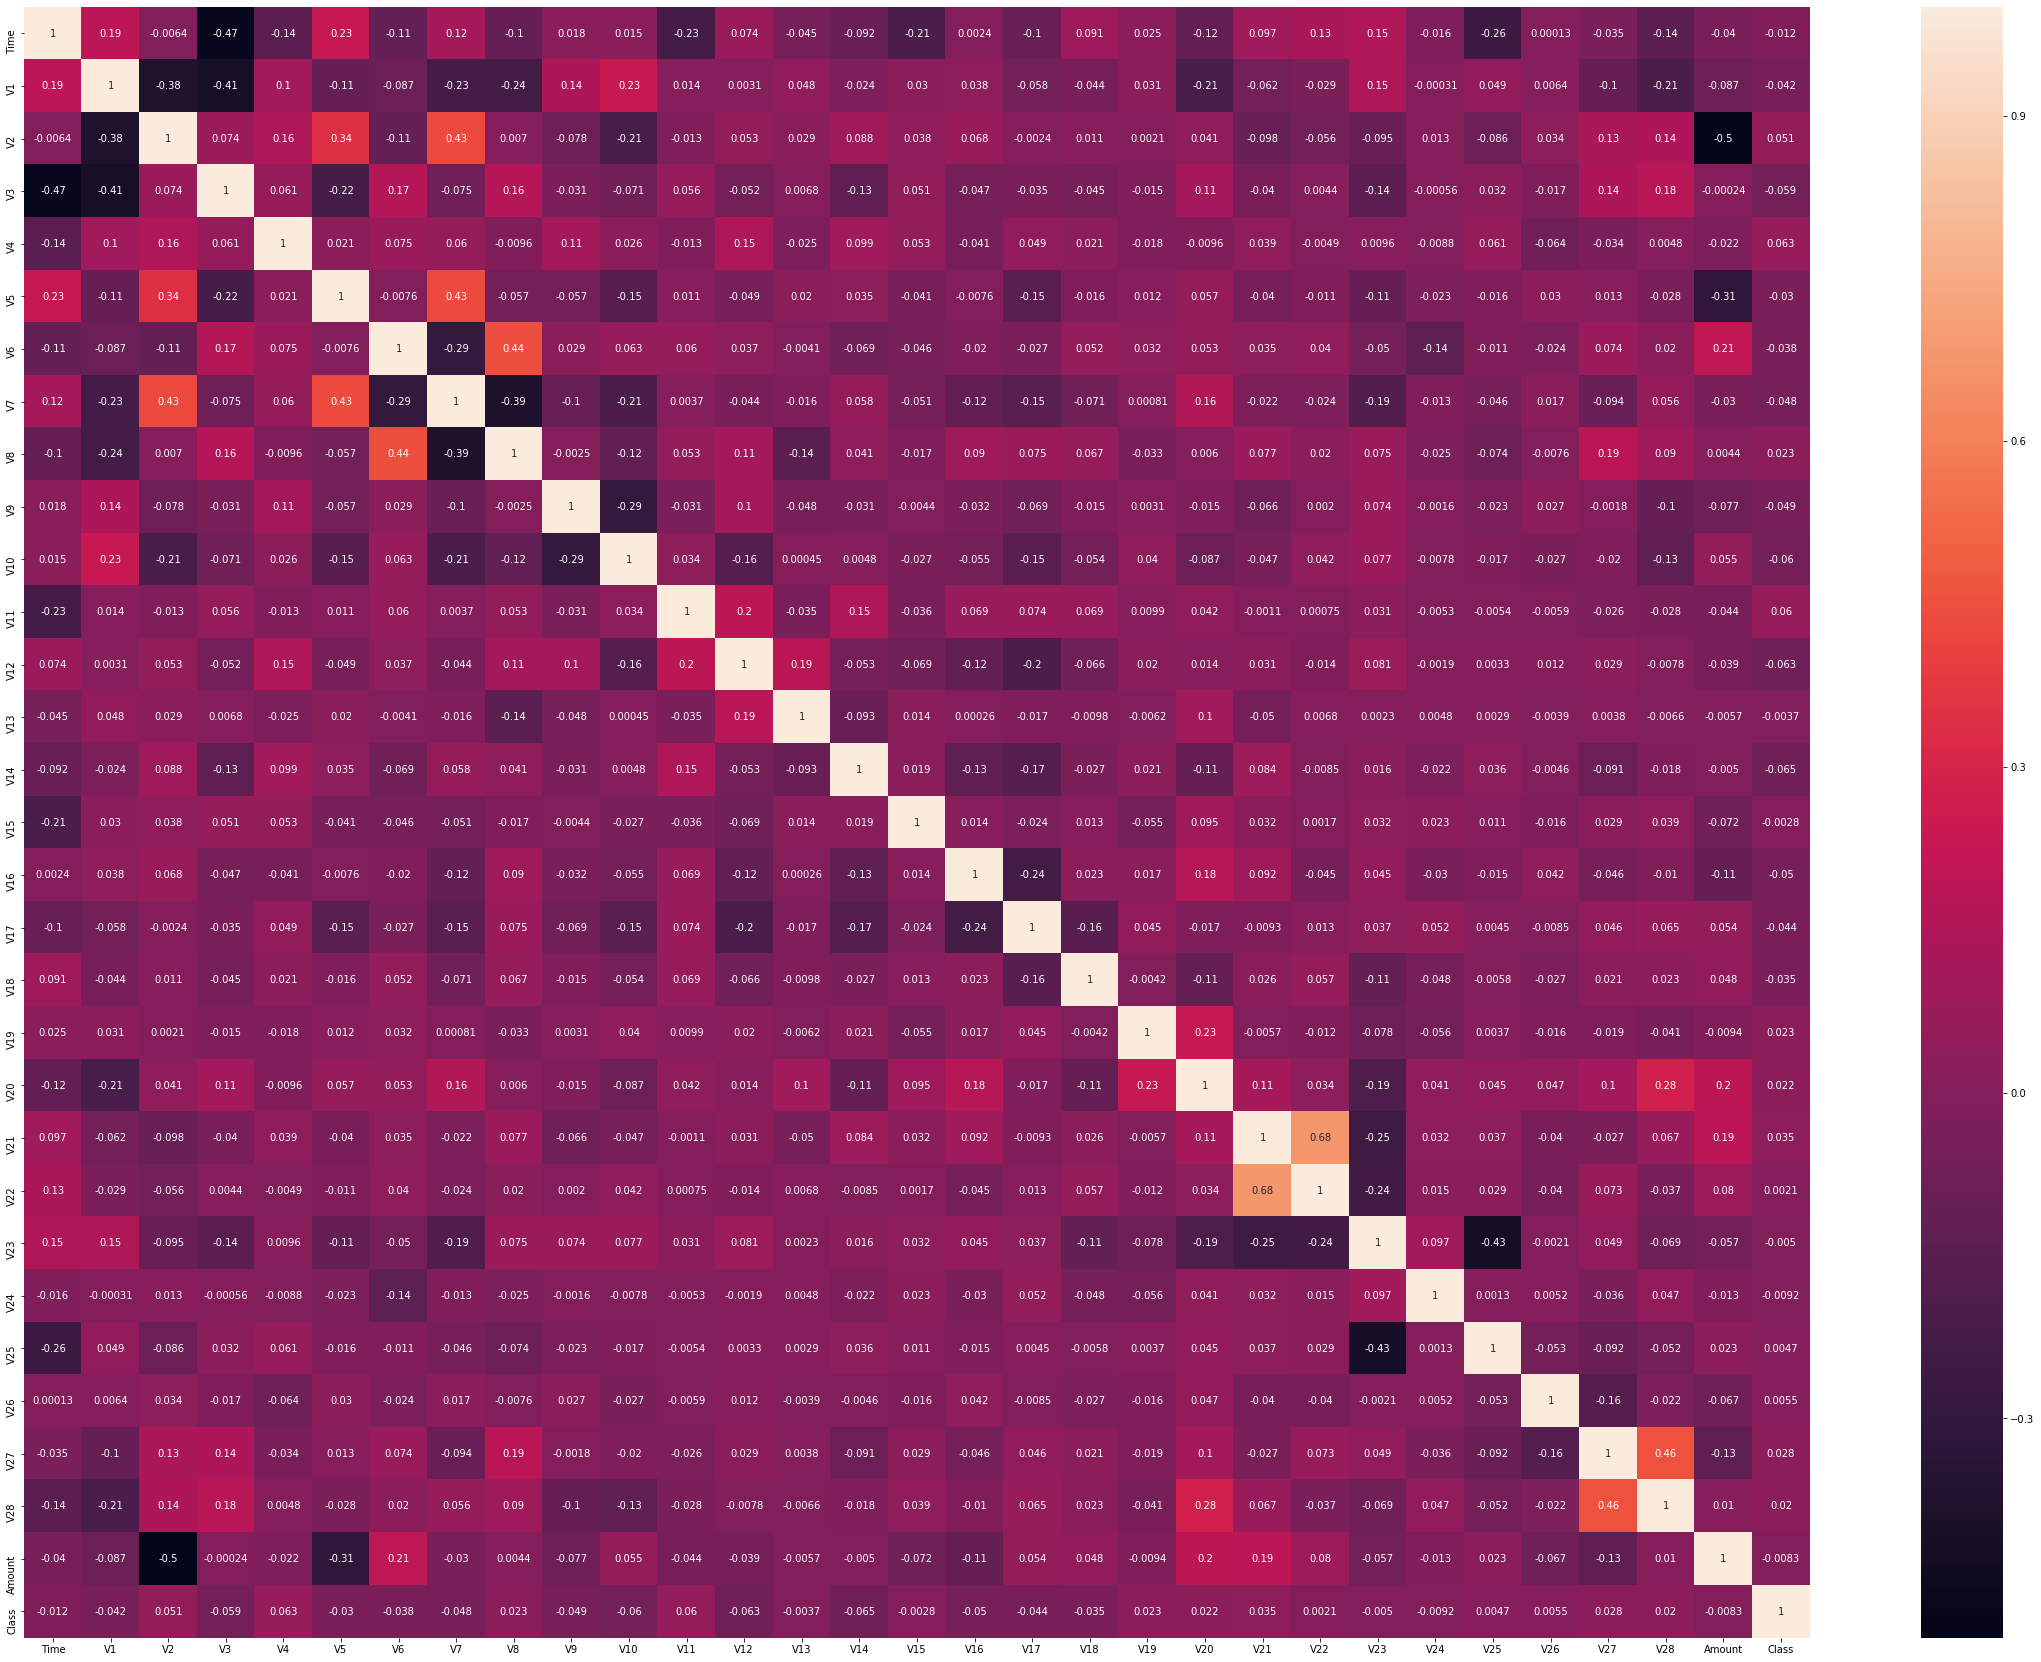

In [21]:
#correlation heatmap
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(method='spearman'),annot=True)

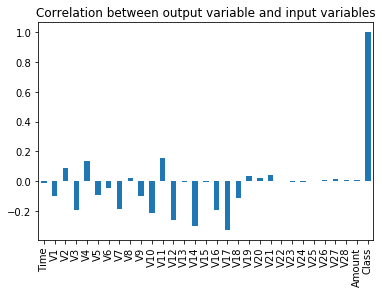

In [22]:
#let's find the correlation of the independent varaibles with that of depenent variable 'Class'
df.corrwith(df['Class']).plot.bar(title='Correlation between output variable and input variables')
plt.show()

#### From the graph we can infere that few columns have correalation of greater than 0.2 with that of the output

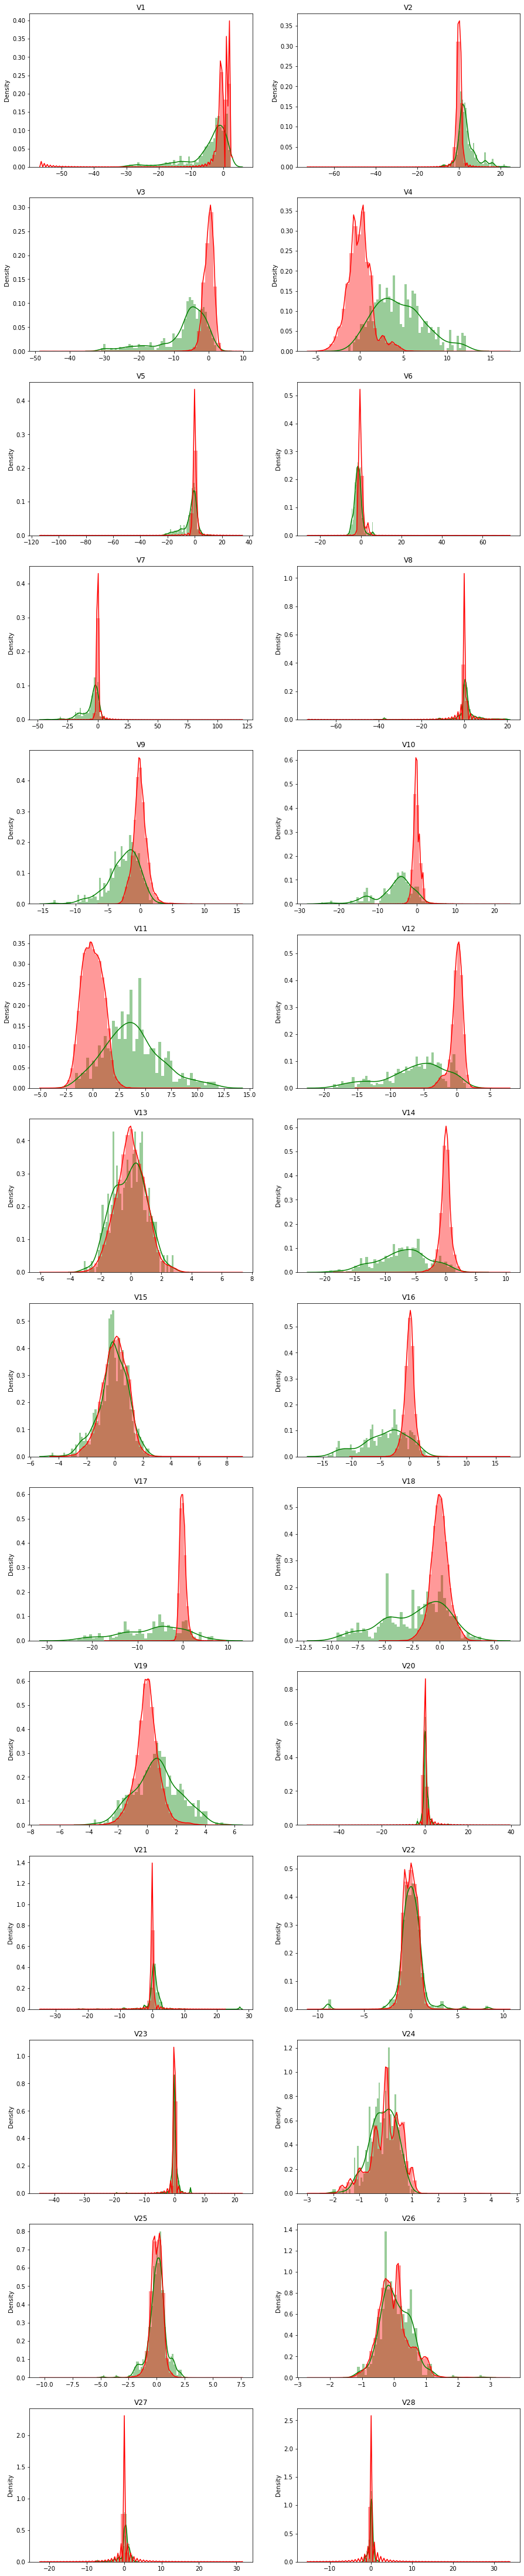

In [23]:
#Let's explore V columns by using boxplots to find different distribution
columns = df.iloc[:,1:29].columns

fraud = df.Class == 1
non_fraud = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][fraud], bins = 50, color='g')
    sns.distplot(df[col][non_fraud], bins = 50, color='r')
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

##### Variable V3,V4,V13,V14,V15,V18,V19,V20 has different distribution for fraud and non-fraud transactions

### Data Preparation

In [24]:
df.shape

(284807, 31)

###### Check the Skewness of features present in the dataset

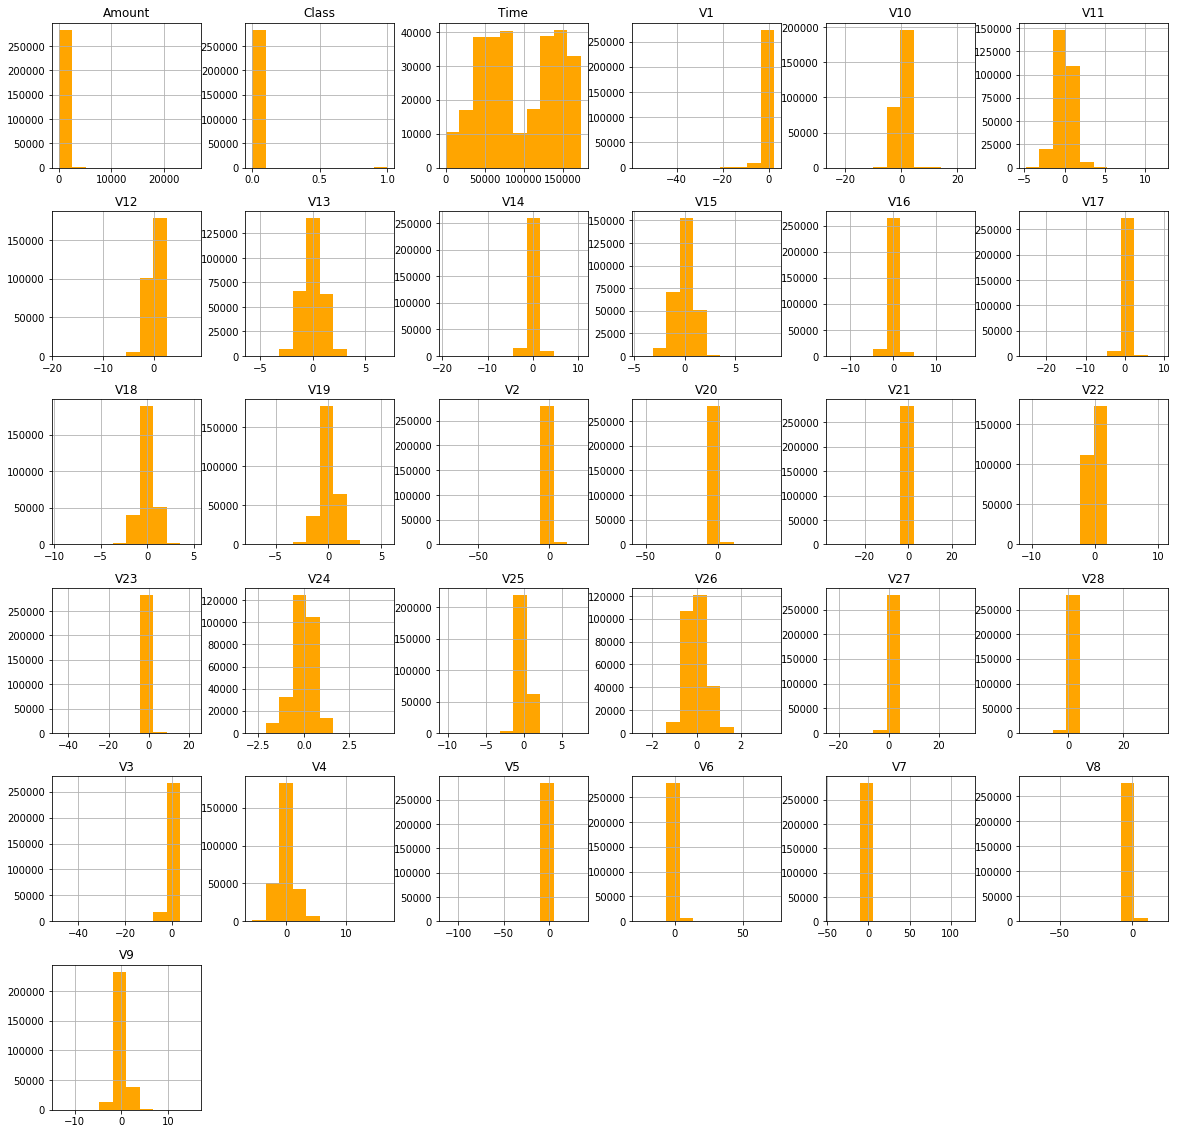

In [25]:
df.hist(figsize=(20,20),color='orange')
plt.show()

In [26]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

##### Mitigate the skweness of features ('V1' to 'V28') uing sklearn Power Transformer

In [27]:
# drop the 'time','Class','Amount' for transformation
x = df.drop(['Time','Amount','Class'],axis=1)

In [28]:
df.shape

(284807, 31)

In [29]:
# Assigning the columns to variable 'cols'
cols = x.columns

In [30]:
from sklearn.preprocessing import PowerTransformer

In [31]:
pt = PowerTransformer(method='yeo-johnson', standardize=True,) 
#Fit the data to the powertransformer
skl_yj = pt.fit(x)

In [32]:
#Check the lambdas 
skl_yj.lambdas_

array([1.483054  , 1.21181645, 1.3413942 , 0.82212404, 1.03167023,
       0.71297871, 1.00056423, 1.28829032, 0.84949197, 0.86428914,
       0.86991383, 1.53988549, 0.9702352 , 1.2591961 , 1.17407763,
       1.26244287, 1.14577666, 1.06970354, 0.96529181, 1.01850228,
       0.90046798, 1.07445675, 1.07407766, 1.42027824, 1.19011365,
       0.51898884, 1.10390567, 0.87511976])

In [33]:
#Transform 
skl_yj = pt.transform(x)

In [34]:
skl_yj.shape

(284807, 28)

In [35]:
# Coverting the array to dataframe after transformation
df1 = pd.DataFrame(skl_yj,columns = cols)

In [36]:
df.shape

(284807, 31)

In [37]:
df1.shape

(284807, 28)

###### PLot the Graphs to check the skewness after power transformation

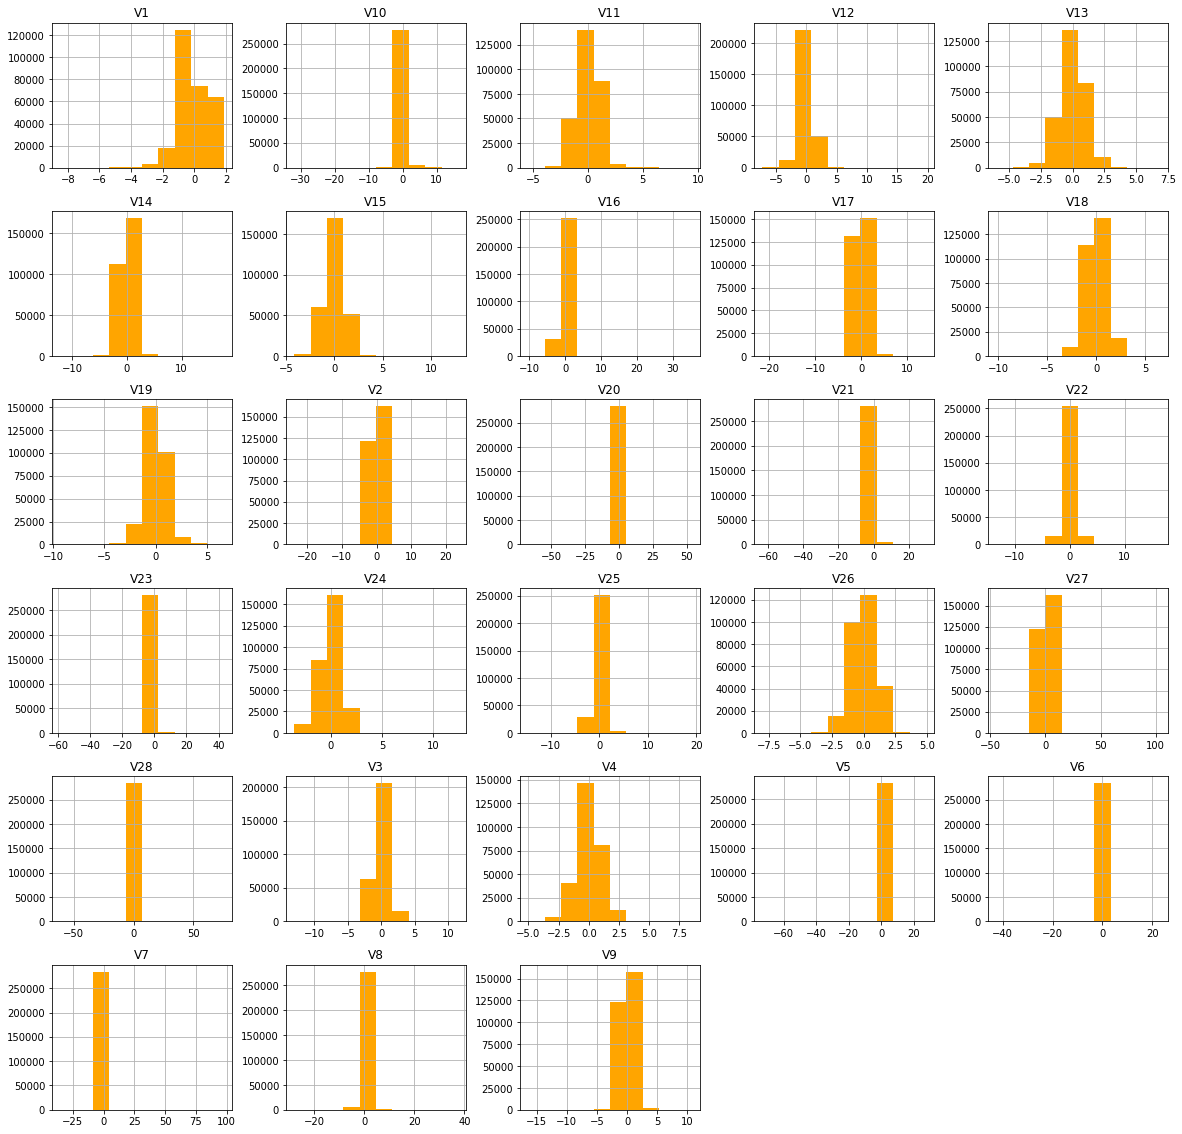

In [38]:
df1.hist(figsize=(20,20),color='orange')
plt.show()

In [39]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [40]:
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,...,0.503467,0.323559,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,...,-0.169496,-0.093203,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,...,-2.838493,0.680896,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,...,-1.528799,-0.273184,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,...,0.986458,0.528646,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838


In [41]:
feat = df[['Time','Amount','Class']]

###### Adding the dropped columns back to the transformed dataframe

In [42]:
df2 = pd.concat([df1,feat],axis=1)

In [43]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Time,Amount,Class
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,...,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,0.0,149.62,0
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,...,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,0.0,2.69,0
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,...,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,1.0,378.66,0
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,...,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,1.0,123.50,0
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,...,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,2.0,69.99,0


In [44]:
df2.shape

(284807, 31)

In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27  

###### Standard scaling the feature "Amount"

In [46]:
std_scaler = StandardScaler()

In [47]:
df2["Norm Amount"] = std_scaler.fit_transform(df2['Amount'].values.reshape(-1, 1))
# drop the time feature column, as we are not considering it for model building because it is not the actual transaction time and we can call it as the serial number
df2.drop(["Time","Amount"],axis=1,inplace=True)

In [48]:
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Norm Amount
0,-0.904815,-0.131503,2.176074,0.983588,-0.256110,0.459227,0.193516,0.020305,0.380443,0.127074,...,-0.007670,0.366644,-0.189647,0.015102,0.211929,-0.323884,0.323027,-0.053332,0,0.244964
1,0.626390,0.093067,-0.035062,0.387928,0.031947,0.045846,-0.063874,0.006711,-0.184488,-0.115195,...,-0.298760,-0.884170,0.153342,-0.637483,0.288440,0.353130,-0.035793,0.057491,0,-0.342475
2,-0.904242,-0.871858,1.381297,0.341811,-0.374492,1.320901,0.639714,0.172348,-1.453859,0.234324,...,0.357879,1.069496,1.501808,-1.133450,-0.653607,-0.209953,-0.151417,-0.173752,0,1.160686
3,-0.742857,-0.202760,1.401049,-0.581136,-0.019151,0.983351,0.191907,0.309141,-1.319689,-0.008922,...,-0.133275,-0.013060,-0.317680,-1.756645,1.276336,-0.399896,0.144087,0.201524,0,0.140534
4,-0.823641,0.530197,1.160592,0.357540,-0.305614,0.187360,0.479194,-0.331706,0.769520,0.718432,...,0.004660,1.107811,-0.232990,0.145885,-0.429239,1.053668,0.541488,0.669838,0,-0.073403


In [49]:
df2.shape

(284807, 30)

### Train test split

In [50]:
y = df2['Class']
X = df2.drop(columns=['Class'])

In [51]:
X.shape

(284807, 29)

In [52]:
y.shape

(284807,)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state=42)

In [54]:
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (199364, 29)
y_train shape : (199364,)
X_test shape : (85443, 29)
y_test shape : (85443,)


## Models without Sampling & without handle imbalance data

### Logistic Regression

In [55]:
# import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

#### Logistic Regression without hyper-parameters

In [56]:
import statsmodels.api as sm

In [57]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199334
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -677.45
Date:                Mon, 11 May 2020   Deviance:                       1354.9
Time:                        18:06:27   Pearson chi2:                 1.98e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.0390      0.194    -46.557      0.000      -9.420      -8.658
V1             -0.1927      0.113     -1.700      0.089      -0.415       0.029
V2             -0.2624      0.099     -2.657      0.008      -0.456      -0.069
V3             -0.4190      0.105     -4.008      0.000      -0.624      -0.214
V4              0.9572      0.103      9.258      0.000       0.755       1.160
V5             -0.0606      0.101     -0.599      0.549      -0.259       0.138
V6              0.1691      0.092      1.831      0.067      -0.012       0.350
V7             -0.2547      0.088     -2.900      0.004      -0.427      -0.083
V8             -0.2038      0.054     -3.748      0.000      -0.310      -0.097
V9             -0.1980      0.103     -1.918      0.055      -0.400       0.004
V10            -0.1235      0.094     -1.317      0.188      -0.307       0.060
V11             0.0276      0.095      0.289      0.773      -0.159       0.215
V12            -0.5830      0.121     -4.830      0.000      -0.820      -0.346
V13            -0.3419      0.096     -3.565      0.000      -0.530      -0.154
V14            -0.8002      0.083     -9.606      0.000      -0.964      -0.637
V15            -0.1436      0.094     -1.532      0.126      -0.327       0.040
V16            -0.4705      0.099     -4.760      0.000      -0.664      -0.277
V17             0.1011      0.060      1.672      0.094      -0.017       0.220
V18             0.1499      0.100      1.496      0.135      -0.046       0.346
V19            -0.2013      0.086     -2.342      0.019      -0.370      -0.033
V20            -0.0581      0.088     -0.660      0.509      -0.231       0.114
V21             0.2644      0.070      3.766      0.000       0.127       0.402
V22             0.4401      0.119      3.696      0.000       0.207       0.674
V23            -0.1115      0.053     -2.118      0.034      -0.215      -0.008
V24             0.0763      0.105      0.729      0.466      -0.129       0.281
V25             0.1293      0.084      1.544      0.122      -0.035       0.293
V26            -0.0197      0.119     -0.165      0.869      -0.253       0.214
V27            -0.0902      0.056     -1.599      0.110      -0.201       0.020
V28            -0.0411      0.035     -1.164      0.244      -0.110       0.028
Norm Amount    -0.0368      0.131     -0.282      0.778      -0.293       0.219
===============================================================================
"""

###### As there are high p-values are present, so using the RFE technique to select the significant features 

In [58]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression(solver='lbfgs')
rfe = RFE(logreg, 23)            
rfe = rfe.fit(X_train, y_train)

In [59]:
rfe.support_

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
       False, False])

In [60]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('V1', True, 1),
 ('V2', True, 1),
 ('V3', True, 1),
 ('V4', True, 1),
 ('V5', False, 4),
 ('V6', True, 1),
 ('V7', True, 1),
 ('V8', True, 1),
 ('V9', True, 1),
 ('V10', True, 1),
 ('V11', False, 5),
 ('V12', True, 1),
 ('V13', True, 1),
 ('V14', True, 1),
 ('V15', True, 1),
 ('V16', True, 1),
 ('V17', True, 1),
 ('V18', True, 1),
 ('V19', True, 1),
 ('V20', False, 2),
 ('V21', True, 1),
 ('V22', True, 1),
 ('V23', True, 1),
 ('V24', True, 1),
 ('V25', True, 1),
 ('V26', False, 7),
 ('V27', True, 1),
 ('V28', False, 3),
 ('Norm Amount', False, 6)]

In [61]:
col = X_train.columns[rfe.support_]

In [62]:
X_train.columns[~rfe.support_]

Index(['V5', 'V11', 'V20', 'V26', 'V28', 'Norm Amount'], dtype='object')

##### Assessing the model with StatsModels

In [63]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Class   No. Observations:               199364
Model:                            GLM   Df Residuals:                   199340
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -678.80
Date:                Mon, 11 May 2020   Deviance:                       1357.6
Time:                        18:06:39   Pearson chi2:                 1.94e+05
No. Iterations:                    12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.0290      0.189    -47.718      0.000      -9.400      -8.658
V1            -0.1854      0.095     -1.954      0.051      -0.371       0.001
V2            -0.1986      0.070     -2.848      0.004      -0.335      -0.062
V3            -0.4111      0.087     -4.734      0.000      -0.581      -0.241
V4             0.9201      0.097      9.472      0.000       0.730       1.110
V6             0.1709      0.078      2.185      0.029       0.018       0.324
V7            -0.2788      0.074     -3.782      0.000      -0.423      -0.134
V8            -0.2115      0.045     -4.714      0.000      -0.299      -0.124
V9            -0.1652      0.095     -1.731      0.083      -0.352       0.022
V10           -0.0874      0.077     -1.130      0.259      -0.239       0.064
V12           -0.5894      0.118     -4.978      0.000      -0.821      -0.357
V13           -0.3446      0.096     -3.587      0.000      -0.533      -0.156
V14           -0.8343      0.074    -11.351      0.000      -0.978      -0.690
V15           -0.1379      0.093     -1.481      0.139      -0.320       0.045
V16           -0.4500      0.096     -4.684      0.000      -0.638      -0.262
V17            0.0880      0.056      1.580      0.114      -0.021       0.197
V18            0.1252      0.098      1.279      0.201      -0.067       0.317
V19           -0.1866      0.080     -2.331      0.020      -0.344      -0.030
V21            0.2465      0.066      3.713      0.000       0.116       0.377
V22            0.4549      0.114      3.982      0.000       0.231       0.679
V23           -0.1116      0.052     -2.153      0.031      -0.213      -0.010
V24            0.0752      0.103      0.730      0.465      -0.127       0.277
V25            0.1330      0.079      1.674      0.094      -0.023       0.289
V27           -0.0832      0.054     -1.533      0.125      -0.189       0.023
==============================================================================
"""

In [64]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

249927    0.000021
214082    0.000255
106005    0.000329
58619     0.000065
191638    0.000179
8043      0.000037
25386     0.000093
107802    0.000046
60765     0.002267
52328     0.000010
dtype: float64

In [65]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([2.10551972e-05, 2.54793914e-04, 3.29404643e-04, 6.46900756e-05,
       1.78904534e-04, 3.72070884e-05, 9.33530786e-05, 4.57634846e-05,
       2.26707056e-03, 1.03477702e-05])

##### Creating a dataframe with the actual fraud flag and the predicted probabilities

In [66]:
y_train_pred_final = pd.DataFrame({'Fraud':y_train.values, 'Fraud_Prob':y_train_pred})
y_train_pred_final['Tx_id'] = y_train.index
y_train_pred_final.head()

,Fraud,Fraud_Prob,Tx_id
0,0,0.000021,249927
1,0,0.000255,214082
2,0,0.000329,106005
3,0,0.000065,58619
4,0,0.000179,191638


#### Checking VIFs

In [67]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,V1,1.32
2,V3,1.19
1,V2,1.12
5,V7,1.08
6,V8,1.08
9,V12,1.07
8,V10,1.03
14,V17,1.03
11,V14,1.03
3,V4,1.03


###### Plotting the ROC Curve

In [69]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [70]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob, drop_intermediate = False )

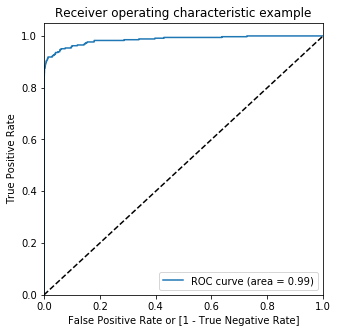

In [71]:
draw_roc(y_train_pred_final.Fraud, y_train_pred_final.Fraud_Prob)

###### Finding Optimal Cutoff Point

In [72]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Fraud_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Fraud,Fraud_Prob,Tx_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.000021,249927,1,0,0,0,0,0,0,0,0,0
1,0,0.000255,214082,1,0,0,0,0,0,0,0,0,0
2,0,0.000329,106005,1,0,0,0,0,0,0,0,0,0
3,0,0.000065,58619,1,0,0,0,0,0,0,0,0,0
4,0,0.000179,191638,1,0,0,0,0,0,0,0,0,0


In [73]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.001725  1.000000  0.000000
0.1   0.1  0.999288  0.819767  0.999598
0.2   0.2  0.999313  0.776163  0.999699
0.3   0.3  0.999343  0.738372  0.999794
0.4   0.4  0.999308  0.691860  0.999839
0.5   0.5  0.999293  0.668605  0.999864
0.6   0.6  0.999263  0.639535  0.999884
0.7   0.7  0.999202  0.601744  0.999889
0.8   0.8  0.999157  0.575581  0.999889
0.9   0.9  0.999077  0.529070  0.999889


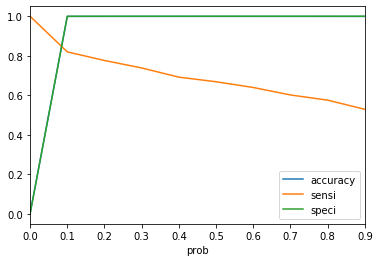

In [74]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.08 is the optimum point to take it as a cutoff probability.

In [75]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Fraud_Prob.map( lambda x: 1 if x > 0.08 else 0)

y_train_pred_final.head()

,Fraud,Fraud_Prob,Tx_id,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.000021,249927,1,0,0,0,0,0,0,0,0,0,0
1,0,0.000255,214082,1,0,0,0,0,0,0,0,0,0,0
2,0,0.000329,106005,1,0,0,0,0,0,0,0,0,0,0
3,0,0.000065,58619,1,0,0,0,0,0,0,0,0,0,0
4,0,0.000179,191638,1,0,0,0,0,0,0,0,0,0,0


In [76]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Fraud, y_train_pred_final.final_predicted)

0.9992526233422283

In [77]:
# Confusion Matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Fraud, y_train_pred_final.final_predicted )
confusion2

array([[198930,     90],
       [    59,    285]], dtype=int64)

In [78]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [79]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8284883720930233

In [80]:
# Let us calculate specificity
TN / float(TN+FP)

0.9995477841422973

In [81]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.0004522158577027434


In [82]:
# Positive predictive value 
print (TP / float(TP+FP))

0.76


In [83]:
# Negative predictive value
print (TN / float(TN+ FN))

0.9997035011985587


##### Logistic Regression model with hyper parameters tuning and using 3 Cross-validations

In [84]:
lr = LogisticRegression(penalty='l2')
parameters = {
    'C': np.linspace(1, 10, 10)
             }
clf1 = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc', verbose=1, n_jobs=3)
clf1.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  30 out of  30 | elapsed:   39.9s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [85]:
#predict response
y_pred = clf1.predict(X_test)

In [86]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85279,    16],
       [   54,    94]], dtype=int64)

In [87]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [88]:
# Sensitvity
TP / float(TP+FN)

0.6351351351351351

In [89]:
# Specificity
TN / float(TN+FP)

0.9998124157336303

In [90]:
# check area under curve
y_pred_prob = clf1.predict_proba(X_test)[:, 1]
print("ROC_AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

ROC_AUC:  0.97


In [91]:
# print best hyperparameters
print("Best hyperparameters: ", clf1.best_params_)

Best hyperparameters:  {'C': 1.0}


In [92]:
y_pred = clf1.predict_proba(X_test)

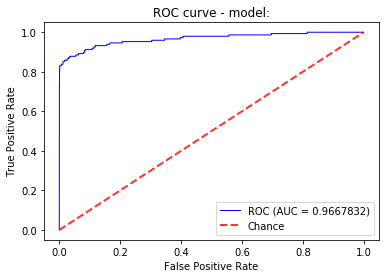

In [93]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


#### Decision Tree Classifier

In [94]:
# Importing decision tree classifier 
from sklearn.tree import DecisionTreeClassifier

# Fitting the decision tree with default hyperparameters
# max_depth which is 10 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=10)
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
# Let's check the evaluation metrics of our default model

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred = dt_default.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.90      0.71      0.79       148

    accuracy                           1.00     85443
   macro avg       0.95      0.85      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [96]:
print(accuracy_score(y_test,y_pred))

0.9993562960102056


In [97]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85283,    12],
       [   43,   105]], dtype=int64)

In [98]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [99]:
# Sensitvity
TP / float(TP+FN)

0.7094594594594594

In [100]:
# Specificity
TN / float(TN+FP)

0.9998593118002228

In [101]:
# check area under curve
y_pred_prob = dt_default.predict_proba(X_test)[:, 1]
print("ROC_AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

ROC_AUC:  0.82


#### Decision Tree by hyper-parameter Tuning

In [102]:
dt_classifier = DecisionTreeClassifier()  

# Find the best parameters 
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

dt_classifier_gs = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'recall')

dt_classifier_gs.fit(X_train, y_train)
best_parameters = dt_classifier_gs.best_estimator_
print('The best parameters for using this model is', best_parameters)
y_pred = dt_classifier_gs.predict(X_test)

The best parameters for using this model is DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [103]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.82      0.79       148

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [104]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85258,    37],
       [   27,   121]], dtype=int64)

In [105]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [106]:
# Sensitvity
TP / float(TP+FN)

0.8175675675675675

In [107]:
# Specificity
TN / float(TN+FP)

0.9995662113840201

In [108]:
# check area under curve
y_pred_prob = dt_classifier_gs.predict_proba(X_test)[:, 1]
print("ROC_AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

ROC_AUC:  0.94


In [109]:
y_pred = dt_classifier_gs.predict_proba(X_test)

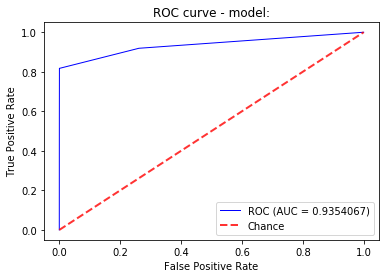

In [110]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


#### Random Forst Classifier

In [111]:
randForest = RandomForestClassifier(n_estimators=50, random_state=0)

# training the RandomForestClassifier
randForest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

[[85289     6]
 [   35   113]]


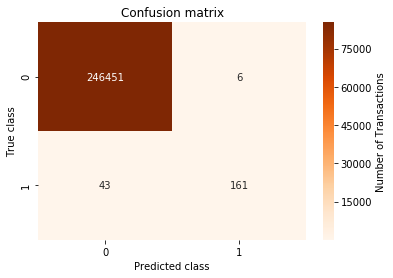

In [112]:
# predicting labels for testing set
y_pred = randForest.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot=True, cmap="Oranges", fmt='o', cbar_kws={'label': 'Number of Transactions'})
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [113]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85289,     6],
       [   35,   113]], dtype=int64)

In [114]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [115]:
# Sensitvity
TP / float(TP+FN)

0.7635135135135135

In [116]:
# Specificity
TN / float(TN+FP)

0.9999296559001114

In [117]:
# check area under curve
y_pred_prob = randForest.predict_proba(X_test)[:, 1]
print("ROC_AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

ROC_AUC:  0.92


In [118]:
y_pred = randForest.predict_proba(X_test)

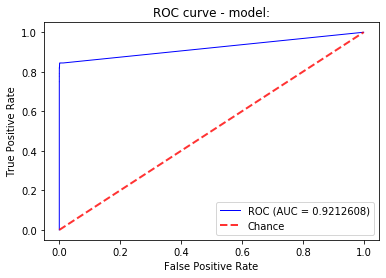

In [119]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


## Class imbalance handling

### SMOTE

In [120]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [121]:
print("X_train shape :",X_train.shape)
print("y_train shape :",y_train.shape)
print("X_test shape :",X_test.shape)
print("y_test shape :",y_test.shape)

X_train shape : (199364, 29)
y_train shape : (199364,)
X_test shape : (85443, 29)
y_test shape : (85443,)


In [122]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [123]:
print('After OverSampling_SMOTE, the shape of train_X: {}'.format(X_train_smote.shape))
print('After OverSampling_SMOTE, the shape of train_y: {} \n'.format(y_train_smote.shape))

print("After OverSampling_SMOTE, counts of label '1': {}".format(sum(y_train_smote==1)))
print("After OverSampling_SMOTE, counts of label '0': {}".format(sum(y_train_smote==0)))

After OverSampling_SMOTE, the shape of train_X: (398040, 29)
After OverSampling_SMOTE, the shape of train_y: (398040,) 

After OverSampling_SMOTE, counts of label '1': 199020
After OverSampling_SMOTE, counts of label '0': 199020


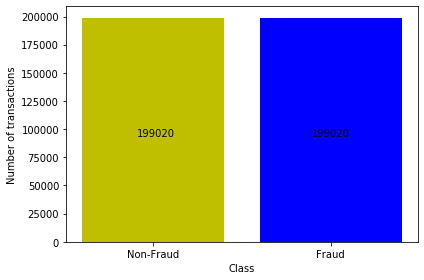

In [124]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_train_smote)[0], Counter(y_train_smote)[1]], color=['y','b'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_train_smote)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_train_smote)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [125]:
X_train_smote

array([[-0.26701656,  0.40484003, -0.03739567, ...,  0.58365581,
         0.26997417, -0.32472304],
       [ 1.16727165, -0.20239375, -1.3879255 , ..., -0.20081272,
        -0.16440807,  0.24648354],
       [-0.79257492, -2.3944022 , -0.98886992, ..., -0.79457982,
         0.70813057,  4.85423789],
       ...,
       [-0.72635687,  1.81676174, -0.94600273, ...,  1.43800567,
         0.59858702, -0.34863398],
       [-3.62053446,  7.17981709, -6.27330129, ..., -4.31528239,
        -1.49492784, -0.2042658 ],
       [-0.91742362,  1.84648396, -2.87280198, ...,  1.42858651,
         0.01640305, -0.16194399]])

## Models After Handeling the Class Imbalancing using SMOTE

### Logistic Regression using Cross validation hyper-parameter tuning

In [126]:
lrs = LogisticRegression(penalty='l2')
parameters = {
    'C': np.linspace(1, 10, 10)
             }
clf2 = GridSearchCV(lrs, parameters, cv=5, scoring='roc_auc', verbose=1, n_jobs=3)
clf2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.0min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  2.3min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [127]:
#predict response
y_pred = clf2.predict(X_test)

In [128]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[83192,  2103],
       [   18,   130]], dtype=int64)

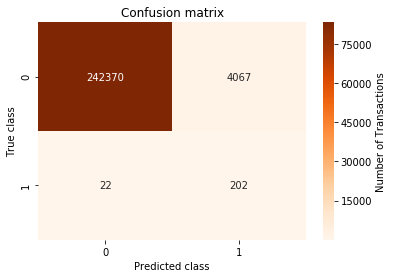

In [129]:
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='o', cbar_kws={'label': 'Number of Transactions'})
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [130]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [131]:
# Sensitvity
TP / float(TP+FN)

0.8783783783783784

In [132]:
# Specificity
TN / float(TN+FP)

0.9753443929890381

In [133]:
# check area under curve
y_pred_prob = clf2.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:  0.97


In [134]:
y_pred = clf2.predict_proba(X_test)

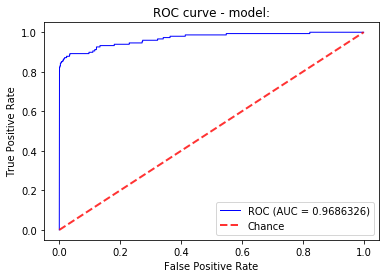

In [135]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


#### Decision Tree Classifier

In [136]:
dt_classifier = DecisionTreeClassifier()  

# Find the best parameters
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

dt_classifier_gs2 = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'roc_auc',cv=3)

dt_classifier_gs2.fit(X_train_smote, y_train_smote)
best_parameters = dt_classifier_gs.best_estimator_
print('The best parameters for using this model is', best_parameters)
y_pred = dt_classifier_gs.predict(X_test)

The best parameters for using this model is DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [137]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.77      0.82      0.79       148

    accuracy                           1.00     85443
   macro avg       0.88      0.91      0.90     85443
weighted avg       1.00      1.00      1.00     85443



In [138]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[85258,    37],
       [   27,   121]], dtype=int64)

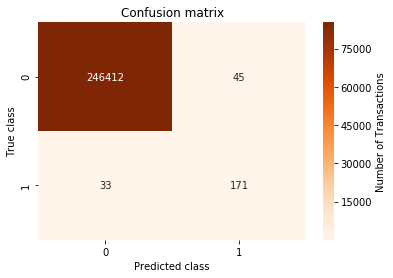

In [139]:
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='o', cbar_kws={'label': 'Number of Transactions'})
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [140]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [141]:
# Sensitvity
TP / float(TP+FN)

0.8175675675675675

In [142]:
# Specificity
TN / float(TN+FP)

0.9995662113840201

In [143]:
# check area under curve
y_pred_prob = dt_classifier_gs2.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:  0.94


In [144]:
y_pred = dt_classifier_gs2.predict_proba(X_test)

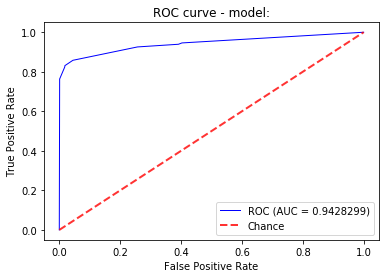

In [145]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


##### Decision Tree using best hyperparameters tuning parameters

In [154]:
dt_classifier = DecisionTreeClassifier()  

# Find the best parameters
param_grid = {"criterion": ["entropy"], "max_depth": [3], 
              "min_samples_leaf": [5]}

dt_classifier_gs2_hyp = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'roc_auc',cv=3)

dt_classifier_gs2_hyp.fit(X_train_smote, y_train_smote)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['entropy'], 'max_depth': [3],
                         'min_samples_leaf': [5]},
             pre

In [155]:
best_parameters = dt_classifier_gs2_hyp.best_estimator_
print('The best parameters for using this model is', best_parameters)
y_pred = dt_classifier_gs2_hyp.predict(X_test)

The best parameters for using this model is DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [156]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     85295
           1       0.03      0.84      0.05       148

    accuracy                           0.95     85443
   macro avg       0.51      0.89      0.51     85443
weighted avg       1.00      0.95      0.97     85443



In [157]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[80857,  4438],
       [   24,   124]], dtype=int64)

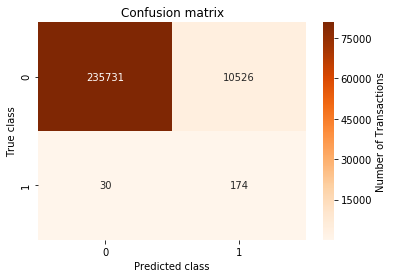

In [158]:
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='o', cbar_kws={'label': 'Number of Transactions'})
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [159]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [160]:
# Sensitvity
TP / float(TP+FN)

0.8378378378378378

In [161]:
# Specificity
TN / float(TN+FP)

0.9479688141157161

In [162]:
# check area under curve
y_pred_prob = dt_classifier_gs2_hyp.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:  0.94


In [163]:
y_pred = dt_classifier_gs2_hyp.predict_proba(X_test)

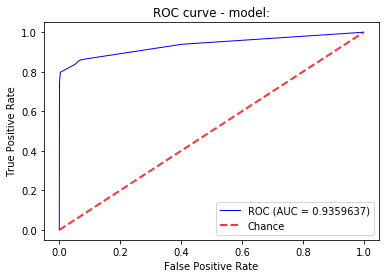

In [164]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


#### Random Forest Classifer

In [165]:
forest = RandomForestClassifier(n_jobs =3)

# hyperparameters
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds using stratified k folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rand_model2 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=3, verbose=5)

In [166]:
# fit model
rand_model2.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  4.2min
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  6.9min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  6.9min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=3,
                                              oob_score=False,
                                              random_state=None, verbose=0,
               

In [167]:
# print best hyperparameters
print("Best AUC: ", rand_model2.best_score_)
print("Best hyperparameters: ", rand_model2.best_params_)

Best AUC:  0.9999816880450111
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 'auto'}


In [168]:
from imblearn.metrics import sensitivity_specificity_support

In [169]:
# predict churn on test data
y_pred = rand_model2.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rand_model2.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85281    14]
 [   33   115]]
Sensitivity: 	0.78
Specificity: 	1.0
AUC:    	 0.93


In [170]:
y_pred = rand_model2.predict_proba(X_test)

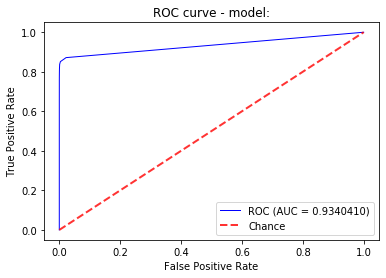

In [171]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


##### Random forest Classifier using best hyperparameters

In [172]:
forest = RandomForestClassifier(n_jobs =3)

# hyperparameter space
params = {"criterion": ['gini'], "max_features": [0.4]}

# create 5 folds using stratified k folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rand_model2_hyp = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=3, verbose=5)

In [173]:
# fit model
rand_model2_hyp.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.2min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=3,
                                              oob_score=False,
                                              random_state=None, verbose=0,
               

In [174]:
# print best hyperparameters
print("Best AUC: ", rand_model2_hyp.best_score_)
print("Best hyperparameters: ", rand_model2_hyp.best_params_)

Best AUC:  0.9999740677995679
Best hyperparameters:  {'criterion': 'gini', 'max_features': 0.4}


In [175]:
from imblearn.metrics import sensitivity_specificity_support

In [176]:
# predict churn on test data
y_pred = rand_model2_hyp.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rand_model2_hyp.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85269    26]
 [   38   110]]
Sensitivity: 	0.74
Specificity: 	1.0
AUC:    	 0.93


In [177]:
y_pred = rand_model2_hyp.predict_proba(X_test)

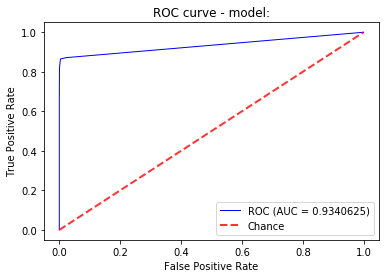

In [178]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


### XGBoost

In [179]:
from xgboost import XGBClassifier

In [180]:
# A parameter grid for XGBoost
#params = {
#        'min_child_weight': [1, 5, 10],
#        'gamma': [0.5, 1, 1.5, 2, 5],
#        'subsample': [0.6, 0.8, 1.0],
#        'colsample_bytree': [0.6, 0.8, 1.0],
#        'max_depth': [3, 8, 10]
#        }
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1],
        'gamma': [0.5],
        'subsample': [0.8],
        'colsample_bytree': [0.8],
        'max_depth': [9]
        }

In [181]:
xgb = XGBClassifier(learning_rate=0.2, n_estimators=200, objective='binary:logistic', silent=True, nthread=1)

In [182]:
folds = 7
skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state =4)

grid_cv = GridSearchCV(xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf, verbose=3)

In [183]:
import xgboost as xgb

In [184]:
X_train_smote

array([[-0.26701656,  0.40484003, -0.03739567, ...,  0.58365581,
         0.26997417, -0.32472304],
       [ 1.16727165, -0.20239375, -1.3879255 , ..., -0.20081272,
        -0.16440807,  0.24648354],
       [-0.79257492, -2.3944022 , -0.98886992, ..., -0.79457982,
         0.70813057,  4.85423789],
       ...,
       [-0.72635687,  1.81676174, -0.94600273, ...,  1.43800567,
         0.59858702, -0.34863398],
       [-3.62053446,  7.17981709, -6.27330129, ..., -4.31528239,
        -1.49492784, -0.2042658 ],
       [-0.91742362,  1.84648396, -2.87280198, ...,  1.42858651,
         0.01640305, -0.16194399]])

In [185]:
colss_X = X_train.columns

In [186]:
colss_X

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Norm Amount'],
      dtype='object')

In [187]:
X_train_smote_up = pd.DataFrame(X_train_smote,columns=colss_X)

In [188]:
X_train_smote_up

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Norm Amount
0,-0.267017,0.404840,-0.037396,-0.496006,0.420824,-0.450224,0.682689,-0.078871,-0.117265,-0.168606,...,-0.053311,-0.306702,-0.795926,0.057863,-0.668773,-0.955531,0.386535,0.583656,0.269974,-0.324723
1,1.167272,-0.202394,-1.387925,0.868094,0.438114,-0.793784,0.743051,-0.436728,-0.244454,0.511881,...,-0.043072,0.402861,0.723505,-0.384676,-0.640839,0.950497,-0.898519,-0.200813,-0.164408,0.246484
2,-0.792575,-2.394402,-0.988870,0.402422,-1.487869,-0.554758,1.294746,-0.713377,-1.217106,0.123029,...,2.875404,0.490984,-1.923880,-1.735150,0.837718,-0.306036,1.660365,-0.794580,0.708131,4.854238
3,-0.538253,0.640564,-0.552007,-0.515426,1.828210,2.170370,0.037099,0.772933,-0.248449,0.161738,...,0.290379,-0.252563,-0.976683,0.225876,1.767288,-1.470704,0.178063,0.013713,0.787930,-0.335278
4,-0.596443,0.056343,0.053093,-1.350219,1.935113,2.522707,-0.160944,0.939584,0.476863,-0.227412,...,0.197054,0.248885,1.051560,-0.526527,1.381591,-0.200223,1.242987,0.172565,-0.091517,-0.335278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398035,0.539688,-0.047194,-0.484899,0.997600,0.182804,0.241548,0.013799,0.051697,0.568028,-0.740075,...,0.013630,-0.433422,-1.301271,-0.211065,-1.415848,0.851116,-0.929843,0.094613,0.191210,0.049703
398036,0.565689,2.493798,-2.933476,3.387951,1.131203,-2.160099,-0.635485,0.026320,-3.144019,-4.399184,...,0.433148,0.190311,-1.089160,-0.143777,0.514006,0.948842,0.305550,1.260680,1.065498,-0.352960
398037,-0.726357,1.816762,-0.946003,2.505858,-0.425085,-0.503551,-1.560044,-0.205694,-1.769141,-3.303873,...,0.438440,1.319082,-0.421606,-0.264292,0.182699,-0.295287,0.317217,1.438006,0.598587,-0.348634
398038,-3.620534,7.179817,-6.273301,3.691653,-7.606411,-3.363755,-13.902895,0.548773,-5.987613,-18.571479,...,0.749873,-0.860955,2.092261,-0.090637,1.298937,-0.164904,-0.623685,-4.315282,-1.494928,-0.204266


In [189]:
type(y_train)

pandas.core.series.Series

In [190]:
type(y_train_smote)

numpy.ndarray

In [191]:
y_train_smote_up = pd.Series(y_train_smote)

In [192]:
type(y_train_smote_up)

pandas.core.series.Series

In [194]:
#X_train_smote_m

In [195]:
#y_train_smote_m

In [196]:
#xgdmat_train = xgb.DMatrix(X_train_smote, y_train_smote)

In [197]:
#dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)
#dtest = xgb.DMatrix(X_test, label=y_test)

In [198]:
#dtrain

In [199]:
#xgdmat_train = xgb.DMatrix(X_train_smote, y_train_smote)
#xgdmat_test = xgb.DMatrix(X_test, y_test)
#xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

In [200]:
grid_cv.fit(X_train_smote_up, y_train_smote_up)

Fitting 7 folds for each of 1 candidates, totalling 7 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   7 | elapsed: 18.3min remaining: 24.4min
[Parallel(n_jobs=4)]: Done   7 out of   7 | elapsed: 33.5min finished


GridSearchCV(cv=StratifiedKFold(n_splits=7, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.2, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=200, n_jobs=1,
                                     nthread=1, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=True,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=4,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0.5],
                         'max_depth'

In [201]:
#make predictions for test data
y_pred = grid_cv.predict(X_test)

In [202]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = grid_cv.predict_proba(X_test)[:, 1]
print("AUC_ROC:   \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85265    30]
 [   27   121]]
Sensitivity: 	0.82
Specificity: 	1.0
AUC_ROC:   	 0.97


In [203]:
print("Best hyperparameters: ", grid_cv.best_params_)

Best hyperparameters:  {'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 9, 'min_child_weight': 1, 'subsample': 0.8}


In [204]:
y_pred = grid_cv.predict_proba(X_test)

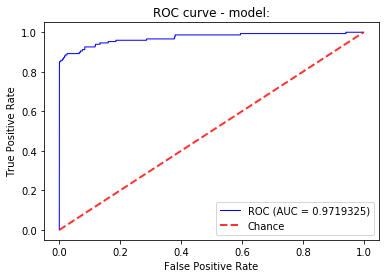

In [205]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()

##### ADASYN Oversampling to handle Class Imbalance

In [206]:
from imblearn.over_sampling import ADASYN 

In [207]:
# apply the ADASYN over-sampling
ada = ADASYN(random_state=42)

In [208]:
print('Original dataset shape :',Counter(y_train))
X_train_syn, y_train_syn = ada.fit_resample(X_train, y_train)
print('Resampled dataset shape :',Counter(y_train_syn))

Original dataset shape : Counter({0: 199020, 1: 344})
Resampled dataset shape : Counter({0: 199020, 1: 198974})


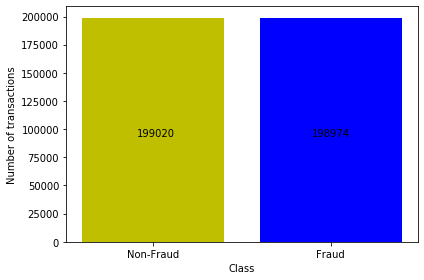

In [209]:
plt.bar(['Non-Fraud','Fraud'], [Counter(y_train_syn)[0], Counter(y_train_syn)[1]], color=['y','b'])
plt.xlabel('Class')
plt.ylabel('Number of transactions')
plt.annotate('{}'.format(Counter(y_train_syn)[0]), (0.20, 0.45), xycoords='axes fraction')
plt.annotate('{}'.format(Counter(y_train_syn)[1]), (0.70, 0.45), xycoords='axes fraction')

plt.tight_layout()
plt.show()

In [210]:
X_train_syn.shape

(397994, 29)

In [211]:
cols_X = X_train.columns

In [212]:
y_train_syn.shape

(397994,)

In [213]:
X_train_syn_up = pd.DataFrame(X_train_syn,columns = cols_X)

In [214]:
X_train_syn_up

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Norm Amount
0,-0.267017,0.404840,-0.037396,-0.496006,0.420824,-0.450224,0.682689,-0.078871,-0.117265,-0.168606,...,-0.053311,-0.306702,-0.795926,0.057863,-0.668773,-0.955531,0.386535,0.583656,0.269974,-0.324723
1,1.167272,-0.202394,-1.387925,0.868094,0.438114,-0.793784,0.743051,-0.436728,-0.244454,0.511881,...,-0.043072,0.402861,0.723505,-0.384676,-0.640839,0.950497,-0.898519,-0.200813,-0.164408,0.246484
2,-0.792575,-2.394402,-0.988870,0.402422,-1.487869,-0.554758,1.294746,-0.713377,-1.217106,0.123029,...,2.875404,0.490984,-1.923880,-1.735150,0.837718,-0.306036,1.660365,-0.794580,0.708131,4.854238
3,-0.538253,0.640564,-0.552007,-0.515426,1.828210,2.170370,0.037099,0.772933,-0.248449,0.161738,...,0.290379,-0.252563,-0.976683,0.225876,1.767288,-1.470704,0.178063,0.013713,0.787930,-0.335278
4,-0.596443,0.056343,0.053093,-1.350219,1.935113,2.522707,-0.160944,0.939584,0.476863,-0.227412,...,0.197054,0.248885,1.051560,-0.526527,1.381591,-0.200223,1.242987,0.172565,-0.091517,-0.335278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397989,1.283742,0.756629,-1.396702,2.520568,1.081297,-0.112709,0.422141,-0.128695,-1.291090,0.382417,...,-0.239434,-0.101223,-0.181434,-0.041453,-0.573087,0.457876,0.244552,-0.059103,0.006639,-0.321560
397990,1.271135,0.847667,-1.438137,2.589105,1.006643,-0.530528,0.546889,-0.212929,-1.410427,0.301920,...,-0.284948,-0.175797,-0.444863,0.038652,-0.506667,0.329100,0.120357,-0.075713,0.023781,-0.324303
397991,1.267480,0.872179,-1.441615,2.605185,0.983802,-0.632673,0.573607,-0.233028,-1.443178,0.280158,...,-0.293485,-0.204117,-0.539013,0.070866,-0.491163,0.271784,0.065192,-0.077744,0.029793,-0.325694
397992,1.243730,0.633296,-1.122509,2.507634,0.787338,0.123502,0.046646,0.041323,-0.977214,0.349066,...,-0.197920,-0.050107,-0.108798,0.085165,-0.415895,-0.040124,0.106295,0.011680,0.057753,-0.302615


In [215]:
type(y_train)

pandas.core.series.Series

In [216]:
type(y_train_syn)

numpy.ndarray

In [217]:
y_train_syn_up = pd.Series(y_train_syn)

In [218]:
y_train_syn_up

0         0
1         0
2         0
3         0
4         0
         ..
397989    1
397990    1
397991    1
397992    1
397993    1
Length: 397994, dtype: int64

## Models After Handeling the Class Imbalancing using ADASyn

### Logistic Regression using Cross validation hyper-parameter tuning

In [219]:
# import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

In [220]:
lrs = LogisticRegression(penalty='l2')
parameters = {
    'C': np.linspace(1, 10, 10)
             }
clf3 = GridSearchCV(lrs, parameters, cv=5, scoring='roc_auc', verbose=1, n_jobs=3)
clf3.fit(X_train_syn_up,y_train_syn_up)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:  2.3min
[Parallel(n_jobs=3)]: Done  50 out of  50 | elapsed:  2.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [221]:
#predict response
y_pred = clf3.predict(X_test)

In [222]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[78470,  6825],
       [   15,   133]], dtype=int64)

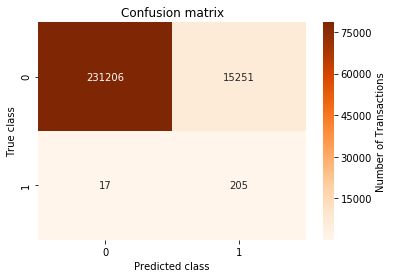

In [223]:
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='o', cbar_kws={'label': 'Number of Transactions'})
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [224]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [225]:
# Sensitvity
TP / float(TP+FN)

0.8986486486486487

In [226]:
# Specificity
TN / float(TN+FP)

0.9199835863766926

In [227]:
# check area under curve
y_pred_prob = clf3.predict_proba(X_test)[:, 1]
print("ROC_AUC_Score: ", round(roc_auc_score(y_test, y_pred_prob),2))

ROC_AUC_Score:  0.97


In [228]:
y_pred = clf3.predict_proba(X_test)

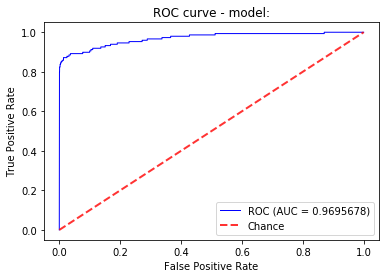

In [229]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


#### Decision Tree Classifier

In [230]:
dt_classifier = DecisionTreeClassifier()  

# Find the best parameters : recall optimisation
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

dt_classifier_gs3 = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'roc_auc',cv=3)

dt_classifier_gs3.fit(X_train_syn_up, y_train_syn_up)
best_parameters = dt_classifier_gs3.best_estimator_
print('The best parameters for using this model is', best_parameters)
y_pred = dt_classifier_gs3.predict(X_test)

The best parameters for using this model is DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [231]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.02      0.85      0.05       148

    accuracy                           0.94     85443
   macro avg       0.51      0.90      0.51     85443
weighted avg       1.00      0.94      0.97     85443



In [232]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[80077,  5218],
       [   22,   126]], dtype=int64)

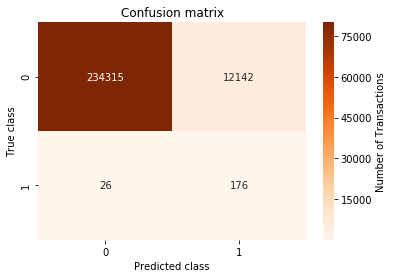

In [233]:
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='o', cbar_kws={'label': 'Number of Transactions'})
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [234]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [235]:
# Sensitvity
TP / float(TP+FN)

0.8513513513513513

In [236]:
# Specificity
TN / float(TN+FP)

0.9388240811301952

In [237]:
# check area under curve
y_pred_prob = dt_classifier_gs3.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:  0.94


In [238]:
y_pred = dt_classifier_gs3.predict_proba(X_test)

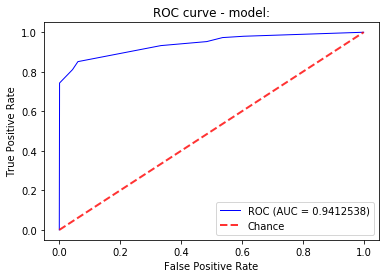

In [239]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


#### Decision Tree classifier using optimal hyperparameters

In [240]:
dt_classifier = DecisionTreeClassifier()  

# Find the best parameters : recall optimisation
param_grid = {"criterion": ["entropy"], "max_depth": [3], 
              "min_samples_leaf": [5]}

dt_classifier_gs3_hyp = GridSearchCV(estimator = dt_classifier, param_grid = param_grid , scoring = 'roc_auc',cv=3)

dt_classifier_gs3_hyp.fit(X_train_syn_up, y_train_syn_up)
best_parameters = dt_classifier_gs3.best_estimator_
print('The best parameters for using this model is', best_parameters)
y_pred = dt_classifier_gs3_hyp.predict(X_test)

The best parameters for using this model is DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [241]:
# Evaluating Decision Tree Classifier
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97     85295
           1       0.02      0.85      0.05       148

    accuracy                           0.94     85443
   macro avg       0.51      0.90      0.51     85443
weighted avg       1.00      0.94      0.97     85443



In [242]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[80077,  5218],
       [   22,   126]], dtype=int64)

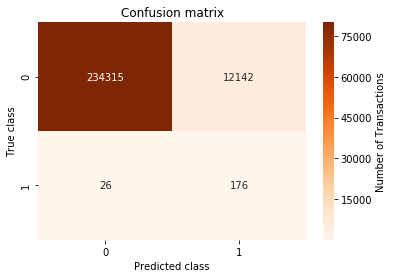

In [243]:
sns.heatmap(cm, annot=True, cmap="Oranges", fmt='o', cbar_kws={'label': 'Number of Transactions'})
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [244]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [245]:
# Sensitvity
TP / float(TP+FN)

0.8513513513513513

In [246]:
# Specificity
TN / float(TN+FP)

0.9388240811301952

In [247]:
# check area under curve
y_pred_prob = dt_classifier_gs3_hyp.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:  0.94


In [248]:
y_pred = dt_classifier_gs3_hyp.predict_proba(X_test)

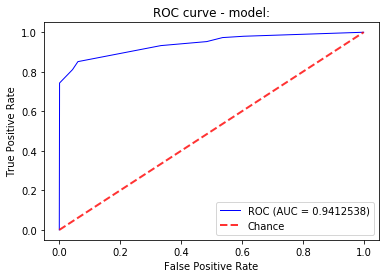

In [249]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


#### Random Forest Classifer

In [250]:
forest = RandomForestClassifier(n_jobs =3)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds using stratified k folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rand_model3 = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=3, verbose=5)

In [251]:
# fit model
rand_model3.fit(X_train_syn_up, y_train_syn_up)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  12 tasks      | elapsed:  4.4min
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  7.6min remaining:    0.0s
[Parallel(n_jobs=3)]: Done  20 out of  20 | elapsed:  7.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=3,
                                              oob_score=False,
                                              random_state=None, verbose=0,
               

In [252]:
# print best hyperparameters
print("Best AUC: ", rand_model3.best_score_)
print("Best hyperparameters: ", rand_model3.best_params_)

Best AUC:  0.9999845116420989
Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}


In [253]:
from imblearn.metrics import sensitivity_specificity_support

In [254]:
# predict churn on test data
y_pred = rand_model3.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rand_model3.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85280    15]
 [   35   113]]
Sensitivity: 	0.76
Specificity: 	1.0
AUC:    	 0.93


##### Random Forest classifer using optimal hyper-parameters

In [255]:
forest = RandomForestClassifier(n_jobs =3)

# hyperparameter space
params = {"criterion": ['entropy'], "max_features": [0.4]}

# create 5 folds using stratified k folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
rand_model3_hyp = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=3, verbose=5)

In [256]:
# fit model
rand_model3_hyp.fit(X_train_syn_up, y_train_syn_up)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   5 | elapsed:  1.5min remaining:  2.3min
[Parallel(n_jobs=3)]: Done   5 out of   5 | elapsed:  2.6min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=3,
                                              oob_score=False,
                                              random_state=None, verbose=0,
               

In [257]:
# print best hyperparameters
print("Best AUC: ", rand_model3_hyp.best_score_)
print("Best hyperparameters: ", rand_model3_hyp.best_params_)

Best AUC:  0.9999796095152182
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [258]:
from imblearn.metrics import sensitivity_specificity_support

In [259]:
# predict churn on test data
y_pred = rand_model3_hyp.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = rand_model3_hyp.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85280    15]
 [   37   111]]
Sensitivity: 	0.75
Specificity: 	1.0
AUC:    	 0.93


### XGBoost

In [260]:
from xgboost import XGBClassifier

In [261]:
# A parameter grid for XGBoost
#params = {
#        'min_child_weight': [1, 5, 10],
#        'gamma': [0.5, 1, 1.5, 2, 5],
#        'subsample': [0.6, 0.8, 1.0],
#        'colsample_bytree': [0.6, 0.8, 1.0],
#        'max_depth': [3, 8, 12]
#        }
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1],
        'gamma': [0.5],
        'subsample': [0.6],
        'colsample_bytree': [0.6],
        'max_depth': [7,9]
        }

In [262]:
xgb = XGBClassifier(learning_rate=0.2, n_estimators=200, objective='binary:logistic', silent=True, nthread=4,seed=27)

In [263]:
folds = 5
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state =4)

grid_cv3 = GridSearchCV(xgb, param_grid=params, scoring='roc_auc', n_jobs=4, cv=skf, verbose=3)

In [264]:
import xgboost as xgb

In [265]:
X_train_syn_up

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Norm Amount
0,-0.267017,0.404840,-0.037396,-0.496006,0.420824,-0.450224,0.682689,-0.078871,-0.117265,-0.168606,...,-0.053311,-0.306702,-0.795926,0.057863,-0.668773,-0.955531,0.386535,0.583656,0.269974,-0.324723
1,1.167272,-0.202394,-1.387925,0.868094,0.438114,-0.793784,0.743051,-0.436728,-0.244454,0.511881,...,-0.043072,0.402861,0.723505,-0.384676,-0.640839,0.950497,-0.898519,-0.200813,-0.164408,0.246484
2,-0.792575,-2.394402,-0.988870,0.402422,-1.487869,-0.554758,1.294746,-0.713377,-1.217106,0.123029,...,2.875404,0.490984,-1.923880,-1.735150,0.837718,-0.306036,1.660365,-0.794580,0.708131,4.854238
3,-0.538253,0.640564,-0.552007,-0.515426,1.828210,2.170370,0.037099,0.772933,-0.248449,0.161738,...,0.290379,-0.252563,-0.976683,0.225876,1.767288,-1.470704,0.178063,0.013713,0.787930,-0.335278
4,-0.596443,0.056343,0.053093,-1.350219,1.935113,2.522707,-0.160944,0.939584,0.476863,-0.227412,...,0.197054,0.248885,1.051560,-0.526527,1.381591,-0.200223,1.242987,0.172565,-0.091517,-0.335278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397989,1.283742,0.756629,-1.396702,2.520568,1.081297,-0.112709,0.422141,-0.128695,-1.291090,0.382417,...,-0.239434,-0.101223,-0.181434,-0.041453,-0.573087,0.457876,0.244552,-0.059103,0.006639,-0.321560
397990,1.271135,0.847667,-1.438137,2.589105,1.006643,-0.530528,0.546889,-0.212929,-1.410427,0.301920,...,-0.284948,-0.175797,-0.444863,0.038652,-0.506667,0.329100,0.120357,-0.075713,0.023781,-0.324303
397991,1.267480,0.872179,-1.441615,2.605185,0.983802,-0.632673,0.573607,-0.233028,-1.443178,0.280158,...,-0.293485,-0.204117,-0.539013,0.070866,-0.491163,0.271784,0.065192,-0.077744,0.029793,-0.325694
397992,1.243730,0.633296,-1.122509,2.507634,0.787338,0.123502,0.046646,0.041323,-0.977214,0.349066,...,-0.197920,-0.050107,-0.108798,0.085165,-0.415895,-0.040124,0.106295,0.011680,0.057753,-0.302615


In [266]:
type(X_train_syn_up)

pandas.core.frame.DataFrame

In [267]:
X_train_syn

array([[-0.26701656,  0.40484003, -0.03739567, ...,  0.58365581,
         0.26997417, -0.32472304],
       [ 1.16727165, -0.20239375, -1.3879255 , ..., -0.20081272,
        -0.16440807,  0.24648354],
       [-0.79257492, -2.3944022 , -0.98886992, ..., -0.79457982,
         0.70813057,  4.85423789],
       ...,
       [ 1.26748042,  0.87217929, -1.44161505, ..., -0.0777442 ,
         0.02979291, -0.32569403],
       [ 1.2437299 ,  0.63329554, -1.1225089 , ...,  0.01167981,
         0.05775282, -0.30261545],
       [ 0.92580139,  0.79720214, -1.10835765, ..., -0.02877591,
         0.11623488, -0.33145945]])

In [268]:
X_test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Norm Amount
186882,-1.323670,1.320965,-0.684013,-0.775141,-1.508372,0.391151,-2.212299,-2.729798,-0.403766,0.147317,...,-2.517969,5.426517,-2.862658,1.694554,-0.487816,-1.992716,-1.019454,-0.452692,-0.245392,-0.203701
165754,-0.401426,0.700465,-0.005506,0.367183,0.874992,-0.179777,1.107379,-0.205037,-0.875963,-0.205642,...,-0.169720,0.201152,0.680007,-0.639244,-0.716695,0.420635,-1.058583,0.349243,0.432114,-0.316167
235285,0.122627,-1.483991,-0.836666,1.161562,-0.820364,0.413617,0.153744,0.083711,0.788690,0.134814,...,1.355780,0.452660,-1.046051,-0.303300,1.020242,-1.423826,-2.612336,-0.254741,0.285076,2.445431
101271,0.747657,0.066335,-0.362842,0.343161,0.162089,-0.121480,0.023639,-0.154319,0.259739,-0.211579,...,-0.069663,-0.517358,-1.555659,-0.088032,-1.632331,0.709444,0.464112,-0.092586,0.066074,-0.293298
5832,0.568410,-0.190487,0.958485,0.766572,-0.651468,0.269124,-0.667011,0.085530,1.955866,-0.579302,...,-0.258857,-0.285651,-0.288365,0.106875,-0.021687,0.225070,0.705333,-0.010472,0.066604,-0.284262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64725,-1.074139,0.873365,-0.769098,-1.953816,1.609814,2.254351,-0.832886,-1.601186,0.220280,-0.051246,...,0.969822,-2.087725,-0.048020,0.408520,1.925551,-0.246591,1.342932,-1.716891,-1.057989,-0.349551
16688,-0.500756,0.411685,0.883422,0.658238,0.880048,0.868026,0.718517,-0.245307,-0.106523,0.579759,...,0.400236,-0.197497,0.357933,-0.432947,-1.695607,-0.001547,-0.427117,-0.047491,-0.851705,-0.298296
183868,1.484719,-0.645427,-1.068193,-0.798594,-0.154853,-0.199260,-0.315712,-0.191362,-0.619739,0.885107,...,0.152863,0.006392,-0.394842,0.339011,0.357557,-0.405482,-0.975778,-0.153923,-0.155593,-0.057371
45011,0.715761,-0.020469,-0.297984,0.307323,0.013726,-0.005944,-0.164479,0.075154,0.251414,0.003942,...,-0.245195,-0.461349,-1.529300,-0.010174,-1.484245,0.473809,0.416924,-0.123447,0.022896,-0.345313


In [269]:
#X_train_smote_m = X_train.as_matrix()
#y_train_smote_m = y_train.as_matrix()
#X_test_m = X_train.as_matrix()
#y_test_m = y_test.as_matrix()

In [270]:
#X_train_smote_m

In [271]:
#y_train_smote_m

In [272]:
#xgdmat_train = xgb.DMatrix(X_train_smote, y_train_smote)

In [273]:
#dtrain = xgb.DMatrix(X_train_smote, label=y_train_smote)
#dtest = xgb.DMatrix(X_test, label=y_test)

In [274]:
#dtrain

In [275]:
#xgdmat_train = xgb.DMatrix(X_train_smote, y_train_smote)
#xgdmat_test = xgb.DMatrix(X_test, y_test)
#xgb_final = xgb.train(params_final, xgdmat_train, num_boost_round = 100)

In [276]:
model_xg = grid_cv3.fit(X_train_syn_up, y_train_syn_up)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   7 out of  10 | elapsed: 20.8min remaining:  8.9min
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed: 26.2min finished


In [277]:
#make predictions for test data
y_pred = grid_cv3.predict(X_test)

In [278]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = grid_cv3.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[85267    28]
 [   26   122]]
Sensitivity: 	0.82
Specificity: 	1.0
AUC:    	 0.97


In [279]:
y_pred = grid_cv3.predict_proba(X_test)

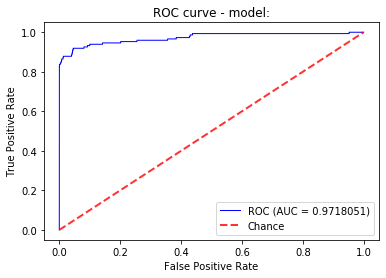

In [280]:
roc_aucclass_names = ['Non-Fraud', 'Fraud']
    
#Obtain probabilities for each class
probas_ = y_pred
    
# Compute ROC curve and area the curve
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, alpha=1, color='b', label='ROC (AUC = %0.7f)' % (roc_auc))
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',label='Chance', alpha=.8)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve - model:')
plt.legend(loc="lower right")
plt.show()


#### Inferences
- Using SMOTE and Random Forest, We are getting ROC_AUC = 0.93, Specificity = 0.99 and Sensitivity = 0.74 and using XGBoost, We are getting ROC_AUC = 0.96, Specificity = 0.99 and Sensitivity = 0.82. We can use XGBoost for the detection 
- Using ADYSyn and and Random Forest, We are getting ROC_AUC = 0.93, Specificity = 0.99 and Sensitivity = 0.76 and using XGBoost, We are getting ROC_AUC = 0.96, Specificity = 0.99 and Sensitivity = 0.82. We can use XGBoost for the detection.